In [1]:
import numpy as np
import pandas as pd
import sklearn
import os
pd.set_option('max_columns',100)

In [2]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_ready.pkl")
PICKLE_FEATURE_DIR = os.path.join("..", "processed_data", "feature_ready.pkl")

In [3]:
features = pd.read_pickle(PICKLE_FEATURE_DIR)
train = pd.read_pickle(PICKLE_TRAIN_DIR)
train

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,43.671279,F,2.920541,20.984222,21.133748,1,217.987028,20.604131,0,4,10.0,37.0,1.00000,0,0,0,0,1,0,0,0,1,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,T,0.000000,25.440000,25.440000,2,678.990000,43.648000,1,3,5.0,2.0,6.00000,0,0,0,1,0,0,0,0,0,1,0
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,F,0.000000,16.380000,16.380000,1,18.890000,13.800000,0,7,7.0,76.0,4.00000,0,0,0,0,0,0,0,1,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,F,0.000000,28.600000,28.600000,1,6.600000,13.856000,0,6,3.0,68.0,8.00000,0,0,0,1,0,0,0,1,0,0,0
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,F,0.000000,30.220000,30.220000,1,25.460000,13.200000,0,6,2.0,69.0,9.00000,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,T,0.000000,27.880000,27.880000,2,381.770000,15.000000,0,4,4.0,7.0,4.92464,0,0,0,1,0,0,0,0,0,1,0
16092,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,43.671279,F,1.228913,0.000000,0.000000,1,90.340000,6.000000,1,4,7.0,40.0,4.00000,0,0,0,1,0,0,0,0,0,1,0
16093,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,F,1.279895,39.840000,39.840000,1,20.380000,15.935000,1,4,1.0,46.0,10.00000,0,0,0,1,0,0,0,0,0,1,0
16094,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,F,0.000000,13.080000,13.080000,1,0.960000,11.000000,0,4,7.0,40.0,4.00000,0,0,0,1,0,0,0,0,0,1,0


In [4]:
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [5]:
train = pd.merge(train , features , on = 'id')
train.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,43.671279,F,2.920541,20.984222,21.133748,1,217.987028,20.604131,0,4,10.0,37.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,T,0.000000,25.440000,25.440000,2,678.990000,43.648000,1,3,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,F,0.000000,16.380000,16.380000,1,18.890000,13.800000,0,7,7.0,76.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,F,0.000000,28.600000,28.600000,1,6.600000,13.856000,0,6,3.0,68.0,8.0,0,0,0,1,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,F,0.000000,30.220000,30.220000,1,25.460000,13.200000,0,6,2.0,69.0,9.0,0,0,0,0,1,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000


In [6]:
train.drop(columns = ['id'] , inplace = True)
train.dropna(inplace = True)
y = train.loc[:,'churn']
train.drop(columns = ['churn'] , inplace = True)
train

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,43.671279,F,2.920541,20.984222,21.133748,1,217.987028,20.604131,4,10.0,37.0,1.00000,0,0,0,0,1,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292
1,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,T,0.000000,25.440000,25.440000,2,678.990000,43.648000,3,5.0,2.0,6.00000,0,0,0,1,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871
2,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,F,0.000000,16.380000,16.380000,1,18.890000,13.800000,7,7.0,76.0,4.00000,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000
3,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,F,0.000000,28.600000,28.600000,1,6.600000,13.856000,6,3.0,68.0,8.00000,0,0,0,1,0,0,0,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000
4,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,F,0.000000,30.220000,30.220000,1,25.460000,13.200000,6,2.0,69.0,9.00000,0,0,0,0,1,0,0,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,T,0.000000,27.880000,27.880000,2,381.770000,15.000000,4,4.0,7.0,4.92464,0,0,0,1,0,0,0,0,0,1,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,44.514760,0.000000,0.000000
16092,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,43.671279,F,1.228913,0.000000,0.000000,1,90.340000,6.000000,4,7.0,40.0,4.00000,0,0,0,1,0,0,0,0,0,1,0,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,59.122473,36.488785,8.416235
16093,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,F,1.279895,39.840000,39.840000,1,20.380000,15.935000,4,1.0,46.0,10.00000,0,0,0,1,0,0,0,0,0,1,0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
16094,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,F,0.000000,13.080000,13.080000,1,0.960000,11.000000,4,7.0,40.0,4.00000,0,0,0,1,0,0,0,0,0,1,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000


In [7]:
train['has_gas'].astype('category')
train['has_gas'].replace(to_replace = ['F' , 'T'] , value = [0,1] , inplace = True)
train.head(2)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,43.671279,0,2.920541,20.984222,21.133748,1,217.987028,20.604131,4,10.0,37.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292
1,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,0.000000,25.440000,25.440000,2,678.990000,43.648000,3,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871


In [8]:
X = train.copy(deep = True)

In [9]:
X['has_gas'] = X['has_gas'].astype('int32')
X['nb_prod_act'] = X['nb_prod_act'].astype('int32')
X.dtypes

cons_12m                    float64
cons_gas_12m                float64
cons_last_month             float64
forecast_cons_12m           float64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                       int32
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int32
net_margin                  float64
pow_max                     float64
tenure                        int32
months_to_end               float64
months_modif_prod           float64
months_renewal              float64
channel_epu                   uint8
channel_ewp                   uint8
channel_fix                   uint8
channel_foo                   uint8
channel_lmk                   uint8
channel_sdd                   uint8
channel_usi                   uint8
origin_kam                  

In [10]:

df = pd.DataFrame({'Dtype' : X.dtypes})
df['mask']  = df['Dtype'].isin(['int32' , 'uint8'])
df

,Dtype,mask
cons_12m,float64,False
cons_gas_12m,float64,False
cons_last_month,float64,False
forecast_cons_12m,float64,False
forecast_discount_energy,float64,False
forecast_meter_rent_12m,float64,False
forecast_price_energy_p1,float64,False
forecast_price_energy_p2,float64,False
forecast_price_pow_p1,float64,False
has_gas,int32,True


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
print(sss.get_n_splits(X, y))
print(sss)

train_idx = 0
test_idx = 0
for train_idx , test_idx in sss.split(X,y):
    X_train  , X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train  , y_test = y.iloc[train_idx], y.iloc[test_idx]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1
StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.1,
            train_size=None)
(14397, 40)
(1600, 40)
(14397,)
(1600,)


In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [13]:
from sklearn.model_selection import RandomizedSearchCV
### Setting No.of Tree
estimators = [int(x) for x in np.linspace(100,1000 , num=20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 20, num = 14)]
max_depth.append(None)
# Minimum impurity decrease
min_impurity_decrease = [0.1 , 0.5 , 0.01 , 0.9 , 0.05 , 0.09 , None]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap , 
               'min_impurity_decrease' : min_impurity_decrease}
print(random_grid)

{'n_estimators': [100, 147, 194, 242, 289, 336, 384, 431, 478, 526, 573, 621, 668, 715, 763, 810, 857, 905, 952, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'min_impurity_decrease': [0.1, 0.5, 0.01, 0.9, 0.05, 0.09, None]}


In [84]:
classifier = RandomForestClassifier()
classifier_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 5  , verbose=2, random_state=42, n_jobs = -1)
classifier_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_impurity_decrease': [0.1, 0.5,
                                                                  0.01, 0.9,
                                                                  0.05, 0.09,
                                                                  None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 147, 194, 242,
          

In [127]:
print(classifier_random.best_params_)
print(classifier_random.best_estimator_)
print(classifier_random.best_score_)
classifier = classifier_random.best_estimator_

{'n_estimators': 810, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.9, 'max_features': 'auto', 'max_depth': 12, 'bootstrap': True}
RandomForestClassifier(max_depth=12, min_impurity_decrease=0.9,
                       min_samples_leaf=4, n_estimators=810)
0.9015767434680251


In [14]:
classifier = RandomForestClassifier(max_depth=12, min_impurity_decrease=0.9,
                       min_samples_leaf=4, n_estimators=810)

In [15]:
classifier.fit(X_train , y_train)

RandomForestClassifier(max_depth=12, min_impurity_decrease=0.9,
                       min_samples_leaf=4, n_estimators=810)

In [16]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
acc = accuracy_score(y_train , y_pred)
print("Accuracy : {:.3f}%".format(acc))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy : 0.902%
[[12980     0]
 [ 1417     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12980
           1       0.00      0.00      0.00      1417

    accuracy                           0.90     14397
   macro avg       0.45      0.50      0.47     14397
weighted avg       0.81      0.90      0.85     14397



In [17]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test , y_pred)
print("Accuracy : {:.3f}%".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.902%
[[1443    0]
 [ 157    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1443
           1       0.00      0.00      0.00       157

    accuracy                           0.90      1600
   macro avg       0.45      0.50      0.47      1600
weighted avg       0.81      0.90      0.86      1600



In [18]:
y_train.value_counts()

0    12980
1     1417
Name: churn, dtype: int64

In [19]:
y_test.value_counts()

0    1443
1     157
Name: churn, dtype: int64

# We need to use a resampling strategy


In [14]:
from imblearn.over_sampling import KMeansSMOTE
sm = KMeansSMOTE(random_state=42, cluster_balance_threshold = 0.01 , sampling_strategy = 'minority')
X_res, y_res = sm.fit_resample(X, y)

In [23]:
y_res.value_counts()

1    14428
0    14423
Name: churn, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_res , y_res , test_size = 0.1 , random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25965, 40)
(2886, 40)
(25965,)
(2886,)


In [17]:
y_train.value_counts()

0    13029
1    12936
Name: churn, dtype: int64

In [28]:
classifier = RandomForestClassifier()
classifier_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 5  , verbose=2, random_state=42, n_jobs = -1)
classifier_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_impurity_decrease': [0.1, 0.5,
                                                                  0.01, 0.9,
                                                                  0.05, 0.09,
                                                                  None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 147, 194, 242,
          

In [29]:
print(classifier_random.best_params_)
print(classifier_random.best_estimator_)
print(classifier_random.best_score_)
classifier = classifier_random.best_estimator_

{'n_estimators': 715, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.01, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
RandomForestClassifier(min_impurity_decrease=0.01, min_samples_leaf=4,
                       n_estimators=715)
0.8055844405931062


In [30]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
acc = accuracy_score(y_train , y_pred)
print("Accuracy : {:.3f}%".format(acc))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy : 0.805%
[[10477  2552]
 [ 2502 10434]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     13029
           1       0.80      0.81      0.81     12936

    accuracy                           0.81     25965
   macro avg       0.81      0.81      0.81     25965
weighted avg       0.81      0.81      0.81     25965



In [31]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test , y_pred)
print("Accuracy : {:.3f}%".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.803%
[[1127  267]
 [ 302 1190]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1394
           1       0.82      0.80      0.81      1492

    accuracy                           0.80      2886
   macro avg       0.80      0.80      0.80      2886
weighted avg       0.80      0.80      0.80      2886



In [33]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
 
accuracies = cross_val_score(estimator = classifier, X = X_train,\
     y = y_train, cv = cv)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
print(accuracies)

Accuracy Mean 0.8057770075101096 Accuracy Variance      0.005295555205318156
[0.79934527 0.80801078 0.81398036 0.80146351 0.80088581 0.80300404
 0.81340266 0.81147699 0.80550741 0.80069324]


In [57]:
import matplotlib.pyplot as plt
label = X.columns
importances = classifier.feature_importances_
dic = { l : i for l , i in zip(label , importances)}
df = pd.DataFrame({'Labels' : dic.keys() , 'importances':dic.values()})
df

,Labels,importances
0,cons_12m,0.035242
1,cons_gas_12m,0.022945
2,cons_last_month,0.027735
3,forecast_cons_12m,0.109589
4,forecast_discount_energy,0.003855
5,forecast_meter_rent_12m,0.000920
6,forecast_price_energy_p1,0.000338
7,forecast_price_energy_p2,0.004366
8,forecast_price_pow_p1,0.000000
9,has_gas,0.069033


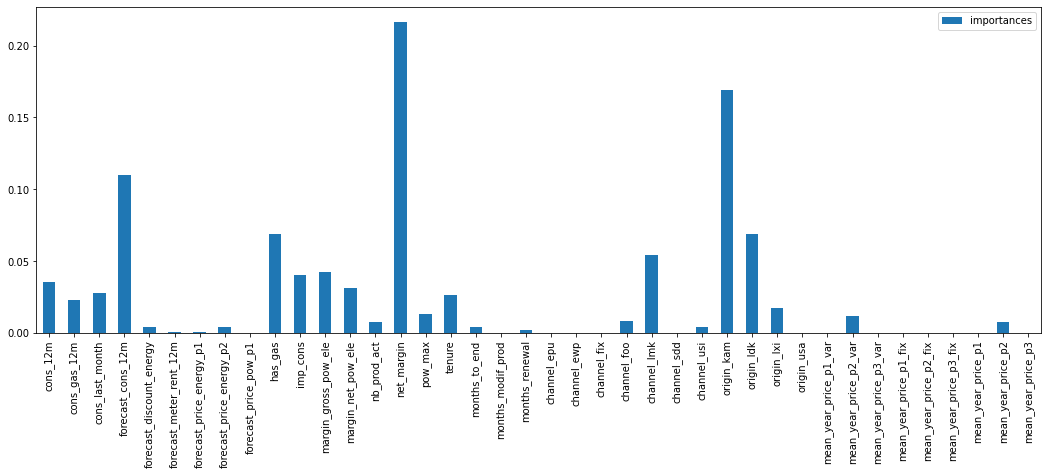

In [58]:
df.plot(kind = 'bar' , figsize = (18,6) , rot = 90)
plt.xticks(ticks = np.arange(len(label))  , labels = dic.keys())
plt.show()

In [59]:
import lime
from lime import lime_tabular

In [60]:
interpretor = lime_tabular.LimeTabularExplainer(
                               training_data = np.array(X_train),
                               feature_names = X_train.columns,
                               mode = 'classification')

In [62]:
exp = interpretor.explain_instance(
            data_row  = X_test.iloc[0],
            predict_fn = classifier.predict_proba
)
exp.show_in_notebook(show_table = True)

1. We are able to see that net_margin is considered as highest importance in predicting churn customers . As well as in above graph the "forecasted_cons_12m and net_margin" have highest predicitive power in churn customers. 
2. So we can accept our null hypothesis that it is possible to provide discount/margin to the customers ( ~20% ) to reduce the chances of churn customers . 

# Let us try with XGBOOST

In [15]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
print(sss.get_n_splits(X, y))
print(sss)

train_idx = 0
test_idx = 0
for train_idx , test_idx in sss.split(X,y):
    X_train  , X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train  , y_test = y.iloc[train_idx], y.iloc[test_idx]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1
StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.1,
            train_size=None)
(14397, 40)
(1600, 40)
(14397,)
(1600,)


In [16]:
y_train.value_counts()

0    12980
1     1417
Name: churn, dtype: int64

In [17]:
from collections import Counter
cn = Counter
count = cn(y_train)
count1 = cn(y_test)
print(count1)
print(count)

Counter({0: 1443, 1: 157})
Counter({0: 12980, 1: 1417})


In [18]:
weight = count[0]/count[1]
weight

9.160197600564572

In [19]:
import xgboost as xgb
from xgboost import XGBClassifier
classifier = XGBClassifier()

In [20]:
params = {
    "learning_rate"   : [0.05 , 0.1, 0.02 , 0.03 , 0.04 , 0.05 , 0.01 , 0.001 , 0.009 , 0.09 ],
    "max_depth"       : [3 , 4 , 5 , 6 , 7 , 8],
    "min_child_weight": [1.5 ,3.5 ,5.5 ,7.5],
    "gamma"           : [0.0 , 0.1 , 0.2 , 0.3 , 0.4],
    "n_estimators"    : [50 , 100 , 150 , 200 , 250 , 300 , 400 , 500 , 600 , 700],
    "colsample_bytree": [1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7],
    "colsample_bylevel":[1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7],
    "scale_pose_weight":[weight , 5.5 , 10 , 8.0 , 1]
    
}

In [32]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = params, n_iter = 100, cv = 10,
                               verbose=2, random_state=42, n_jobs = -1)


In [21]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour , temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin , tsec = divmod(temp_sec , 60)
        print('\n Time taken : %i hours %i minutes and %s seconds.' %(thour , tmin , round(tsec , 2)))

In [34]:
from datetime import datetime

start_time = timer(None)

rf_random.fit(X_train , y_train)

timer(start_time)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[20:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pose_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken : 1 hours 30 minutes and 23.16 seconds.


In [36]:
print(rf_random.best_params_)
print(rf_random.best_estimator_)
print(rf_random.best_score_)
classifier = rf_random.best_estimator_

{'scale_pose_weight': 10, 'n_estimators': 700, 'min_child_weight': 1.5, 'max_depth': 5, 'learning_rate': 0.09, 'gamma': 0.1, 'colsample_bytree': 1, 'colsample_bylevel': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=5,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scale_pose_weight=10, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
0.9105370724268396


In [37]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
acc = accuracy_score(y_train , y_pred)
print("Accuracy : {:.3f}%".format(acc))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy : 0.965%
[[12976     4]
 [  501   916]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12980
           1       1.00      0.65      0.78      1417

    accuracy                           0.96     14397
   macro avg       0.98      0.82      0.88     14397
weighted avg       0.97      0.96      0.96     14397



## Let us try with resampled Data using XGBOOST

In [22]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_res , y_res , test_size = 0.1 , random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25965, 40)
(2886, 40)
(25965,)
(2886,)


In [23]:
from collections import Counter
cn = Counter

count_train = cn(y_train)
count_test = cn(y_test)
print(count_train)
print(count_test)

Counter({0: 13029, 1: 12936})
Counter({1: 1492, 0: 1394})


In [24]:
params.pop('scale_pose_weight')

[9.160197600564572, 5.5, 10, 8.0, 1]

In [25]:
classifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [26]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = params, n_iter = 100, cv = 10,
                               verbose=2, random_state=42, n_jobs = -1)


In [44]:
from datetime import datetime

start_time = timer(None)

rf_random.fit(X_train , y_train)

timer(start_time)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[12:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken : 2 hours 20 minutes and 24.23 seconds.


In [45]:
print(rf_random.best_params_)
print(rf_random.best_estimator_)
print(rf_random.best_score_)

{'n_estimators': 600, 'min_child_weight': 3.5, 'max_depth': 8, 'learning_rate': 0.09, 'gamma': 0.2, 'colsample_bytree': 1, 'colsample_bylevel': 0.4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=8,
              min_child_weight=3.5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.9502793165991574


In [27]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=8,
              min_child_weight=3.5, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
classifier.fit(X_train , y_train)

[19:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=8,
              min_child_weight=3.5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
acc = accuracy_score(y_train , y_pred)
print("Accuracy : {:.3f}%".format(acc))

Accuracy : 0.996%


In [29]:
print(confusion_matrix(y_train, y_pred))

[[13025     4]
 [   94 12842]]


In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13029
           1       1.00      0.99      1.00     12936

    accuracy                           1.00     25965
   macro avg       1.00      1.00      1.00     25965
weighted avg       1.00      1.00      1.00     25965



In [31]:
y_pred_test = classifier.predict(X_test)
acc = accuracy_score(y_test , y_pred_test)
print("Accuracy : {:.3f}%".format(acc))

Accuracy : 0.952%


In [32]:
print(confusion_matrix(y_test, y_pred_test))

[[1379   15]
 [ 124 1368]]


In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1394
           1       0.99      0.92      0.95      1492

    accuracy                           0.95      2886
   macro avg       0.95      0.95      0.95      2886
weighted avg       0.95      0.95      0.95      2886



In [41]:
## Cross validation of results
from sklearn.model_selection import StratifiedKFold,cross_val_score
cv = StratifiedKFold(n_splits=10, random_state=13, shuffle=True)
 
accuracies = cross_val_score(estimator = classifier, X = X_train,\
     y = y_train, cv = cv)


[18:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
print("Training  results:")
print("Accuracy Mean  : {:.3f}% \nAccuracy Variance\
 : {:.3f}%".format(accuracies.mean(),accuracies.std()))
print(accuracies)

Training  results:
Accuracy Mean  : 0.952% 
Accuracy Variance : 0.004%
[0.95725838 0.948402   0.948402   0.95571814 0.9464767  0.94530046
 0.95493066 0.95531587 0.95107858 0.95300462]


In [43]:
 accuracies = cross_val_score(estimator = classifier, X = X_test,\
     y = y_test, cv = cv)


[18:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [44]:
print("Test  results:")
print("Accuracy Mean  : {:.3f}% \nAccuracy Variance\
 : {:.3f}%".format(accuracies.mean(),accuracies.std()))
print(accuracies)

Test  results:
Accuracy Mean  : 0.904% 
Accuracy Variance : 0.013%
[0.91349481 0.91695502 0.9100346  0.88581315 0.89619377 0.90657439
 0.92361111 0.90972222 0.89236111 0.88541667]


AUC - Test Set: 95.31%


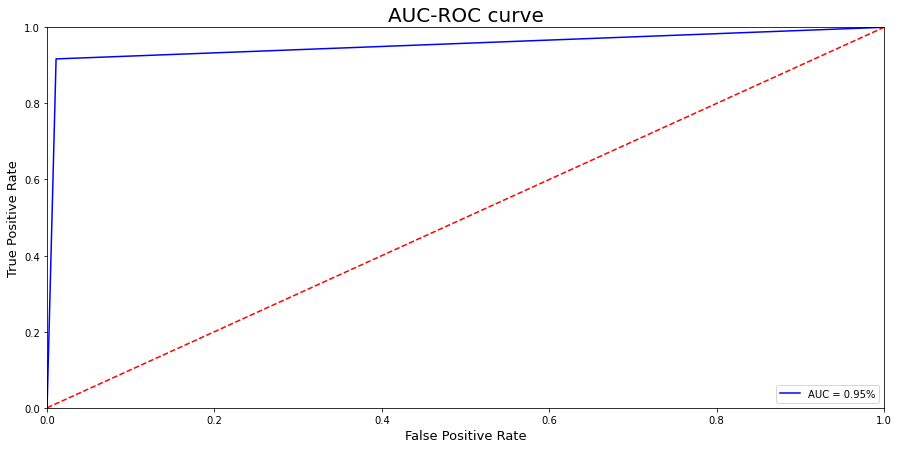

In [34]:
cn_matrix = confusion_matrix(y_test, y_pred_test)
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.auc(fpr,tpr)
print('AUC - Test Set: %.2f%%' % (roc_auc*100))

import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f%%' %roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate' , size = 13)
plt.xlabel('False Positive Rate' , size = 13)
plt.title("AUC-ROC curve" , size = 20)
plt.show()


In [35]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Greens):
   
    import itertools
    
    print('Confusion Matrix')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    #fmt = '.d' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    print(tick_marks)

Confusion Matrix
[0 1]


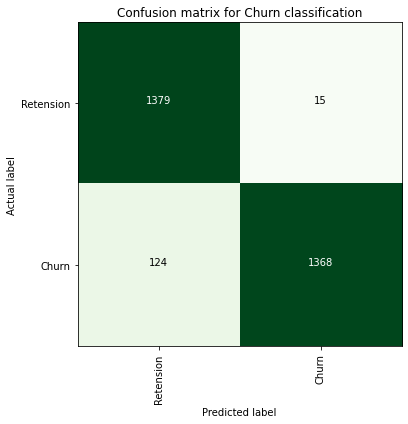

In [36]:
names = ['Retension' , 'Churn']
plt.figure(figsize = (6,6))
plot_confusion_matrix(cn_matrix, classes=names,
                      title='Confusion matrix for Churn classification')

## Model interpretation

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

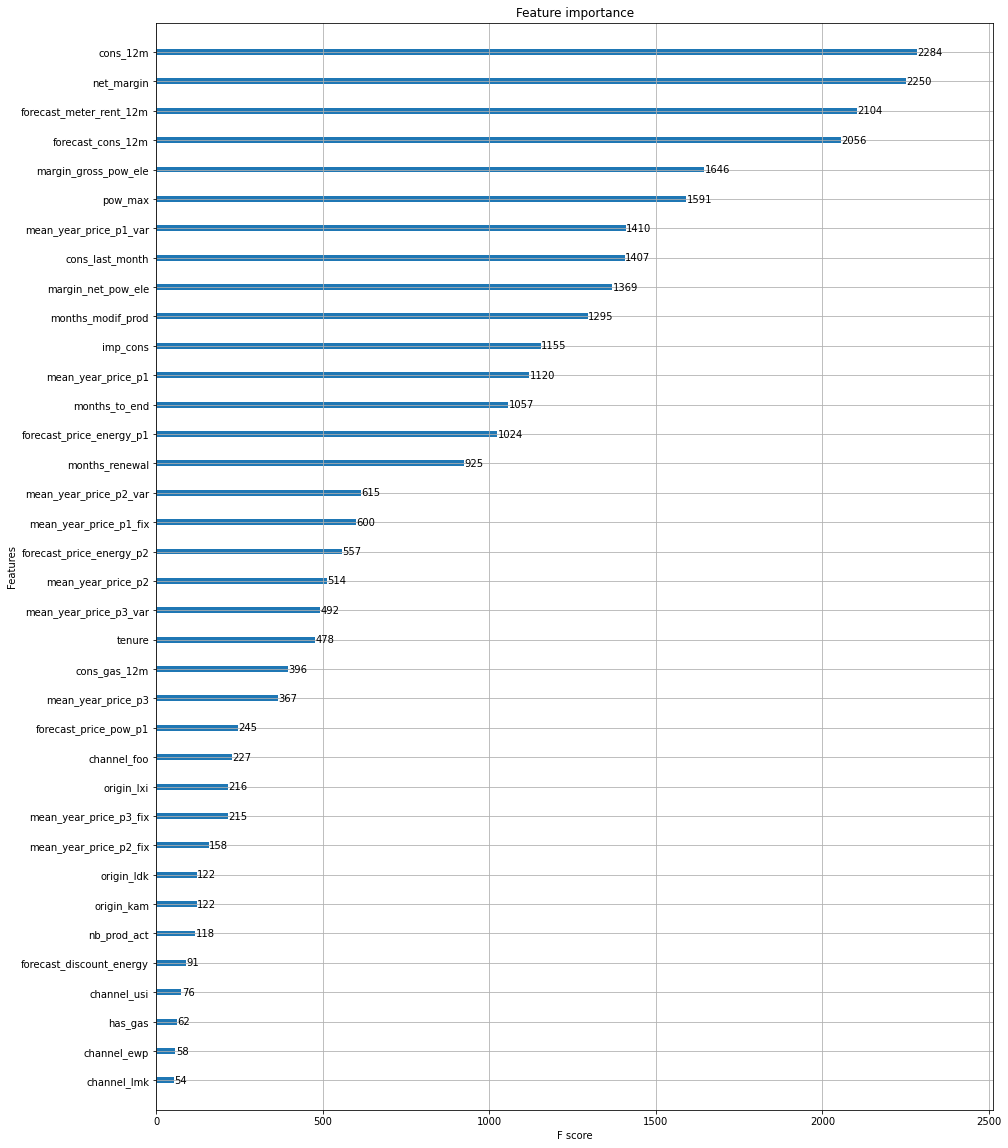

In [37]:
fig, ax = plt.subplots(figsize=(15,20))
xgb.plot_importance(classifier, ax=ax)

1. Above we can see that 'net_margin' have a significant effect on churn possiblities , along with 'cons_12m' and 'forecasted_cons_12m' . 
2. In EDA we have seen that most of the churn customers have high electricity consumptions as well as high forecasted consumptions of electricity so it is clear that these are the most important drivers in predicting churn possiblities , So our hypothethis of providing (~20%) discount to churn customers will work in reducing the churning ratio of customers . 

In [38]:
import shap

In [39]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)

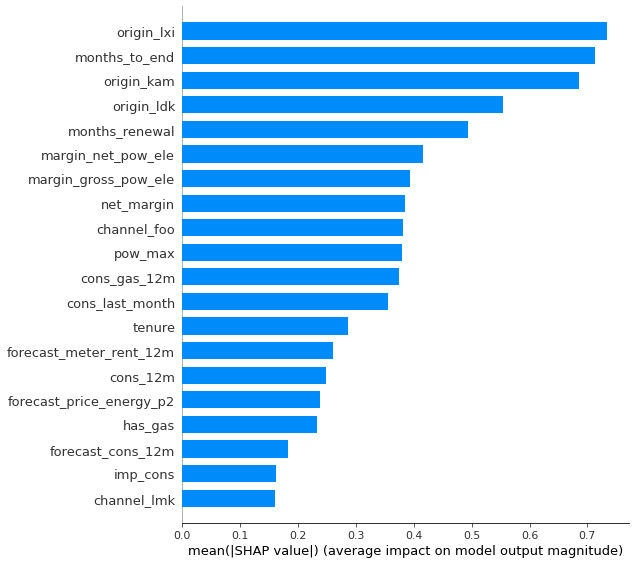

In [40]:
# Feature importance 
shap.summary_plot(shap_values, X_test, plot_type='bar')

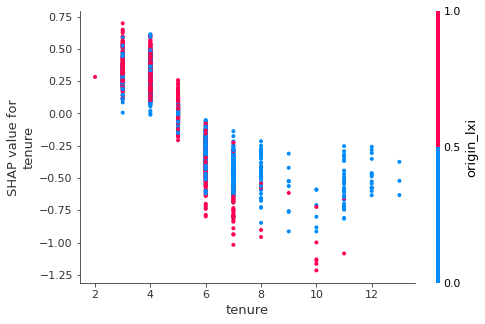

In [41]:
shap.dependence_plot("tenure", shap_values, X_test)#, interaction_index="origin_lxi")

We are able to see specially the tenure column ( No.of years with our client ) . Till 10 the overall the overall trend is decreasing means as years increases the lesser the company is churn , however from 10 onwards we can see an increase in churn.

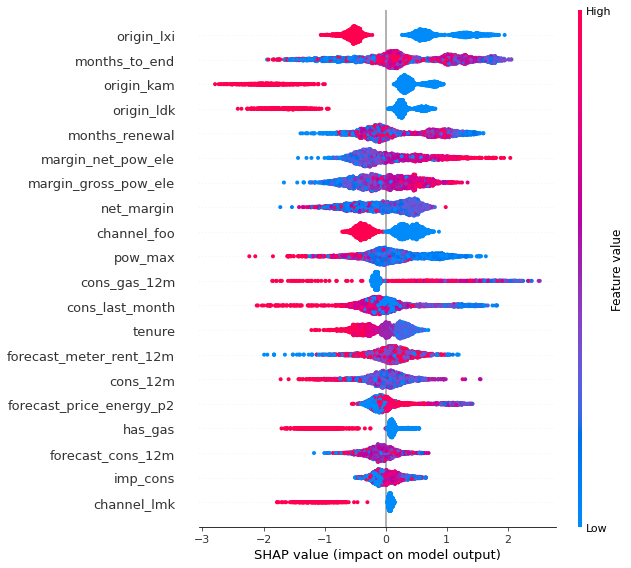

In [43]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_test)
f.savefig("summary_plot1.png", bbox_inches='tight',)# dpi=600)

In [47]:
# Shap single value prediction
shap.force_plot(explainer.expected_value, shap_values[1000], X_test.iloc[1000,:], link="logit")

In [48]:
shap.initjs()

In [59]:
shap.force_plot(explainer.expected_value, shap_values[1042], X_test.iloc[1042,:], link="logit")

In [58]:
y_test.iloc[1042]

1

#### Above in single value prediction we can see that how 'forecasted_price_energy' and overall margins are impacting the likelihood of churn . Along months_to_end which in case most of higher values are impacting most the churn likelihood . As we have seen with tenure column that more the company have longer contract with our client the less the churn is and so did months_to_end . 